In [1]:
import scipy. io.wavfile as wavfile
import numpy as np

with open("data/p8/laurel_yanny.wav", "rb") as f:
    sample_rate, data = wavfile.read(f)

def save(dt, sample_rate, fn):
    dt = (dt * 1.0/ np.max(np.abs(dt)) * 32767).astype(np.int16)
    with open(f"out/p8/{fn}.wav", "wb") as f:
        wavfile.write(f, sample_rate, dt)

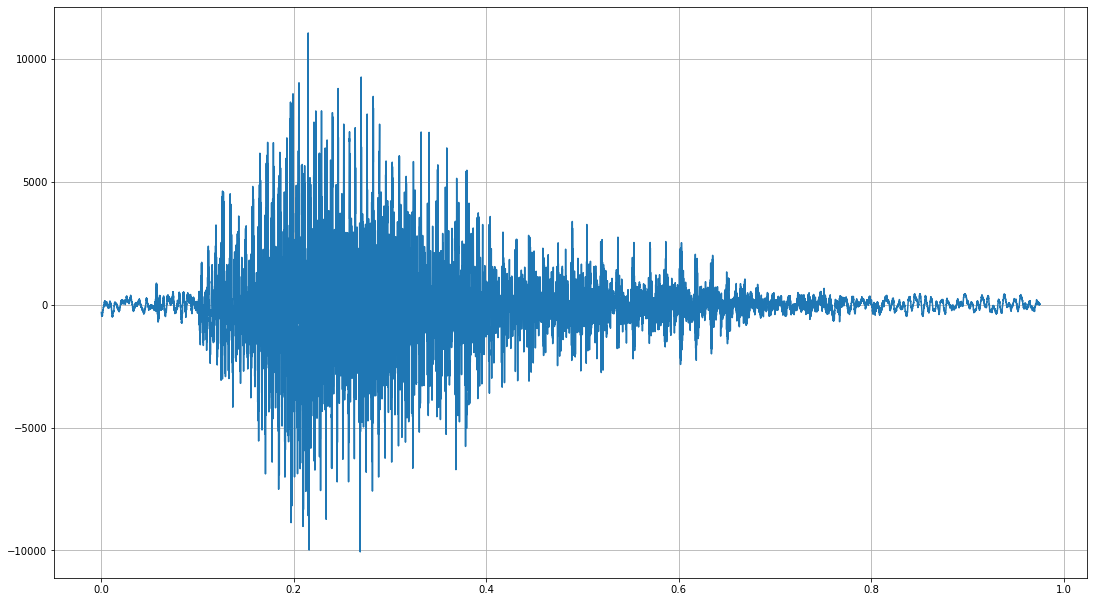

In [2]:
import matplotlib.pyplot as plt

xs = np.linspace(0, len(data) / sample_rate, len(data))

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax1.plot(xs, data)

plt.grid()
plt.show()

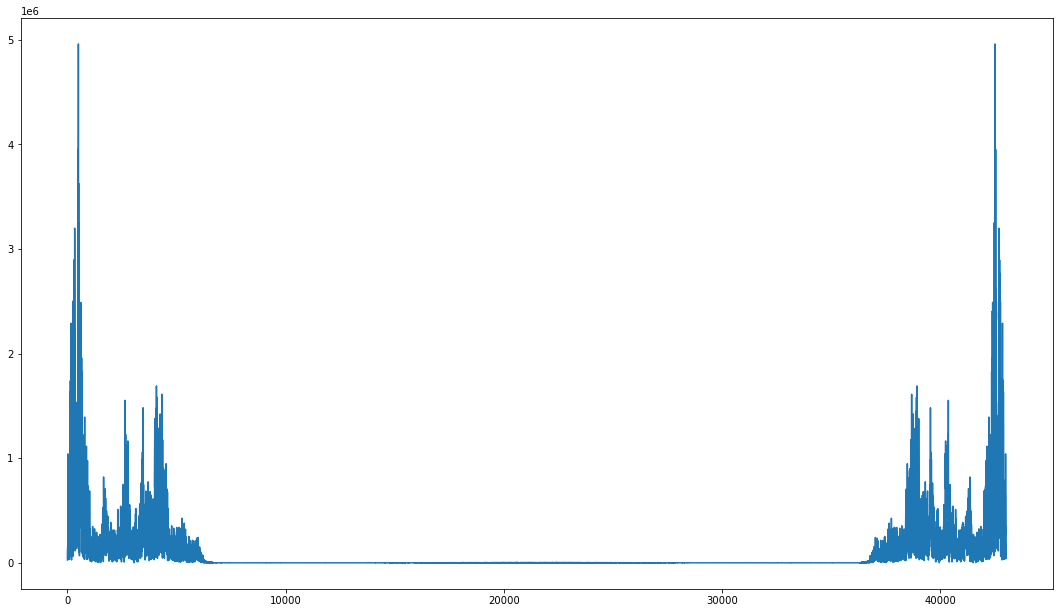

In [3]:
from scipy.fft import fft, ifft, fftfreq

xs = np.arange(0, len(data))
yf = fft(data)

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax1.plot(xs, np.abs(yf))

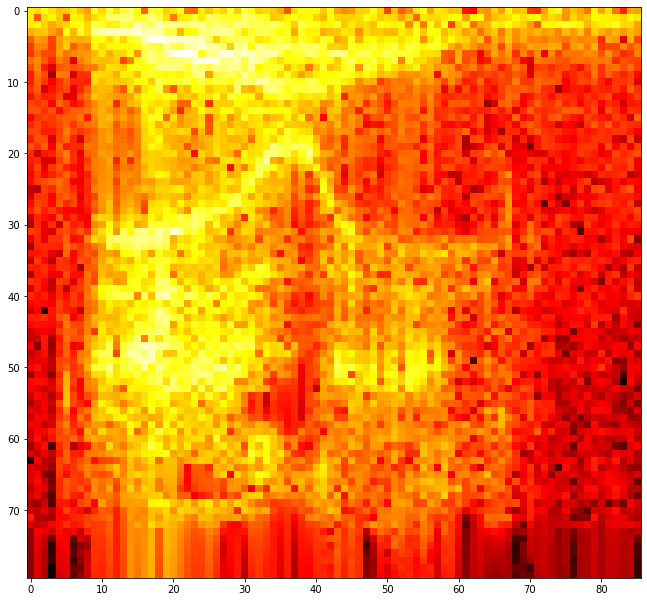

In [4]:
block_points = 500
num_blocks = len(data) // block_points

num_fourier_coefficients = 80

heatdata = []

for block_idx in range(num_blocks):
    block = data[block_idx * block_points:(block_idx + 1) * block_points]
    blockf = fft(block)
    heatdata.append(np.log(np.abs(blockf[:num_fourier_coefficients])))

heatdata = np.array(heatdata).T

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax1.imshow(heatdata, cmap='hot')

/Users/lacungus/opt/miniconda3/envs/cs168/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lacungus/opt/miniconda3/envs/cs168/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


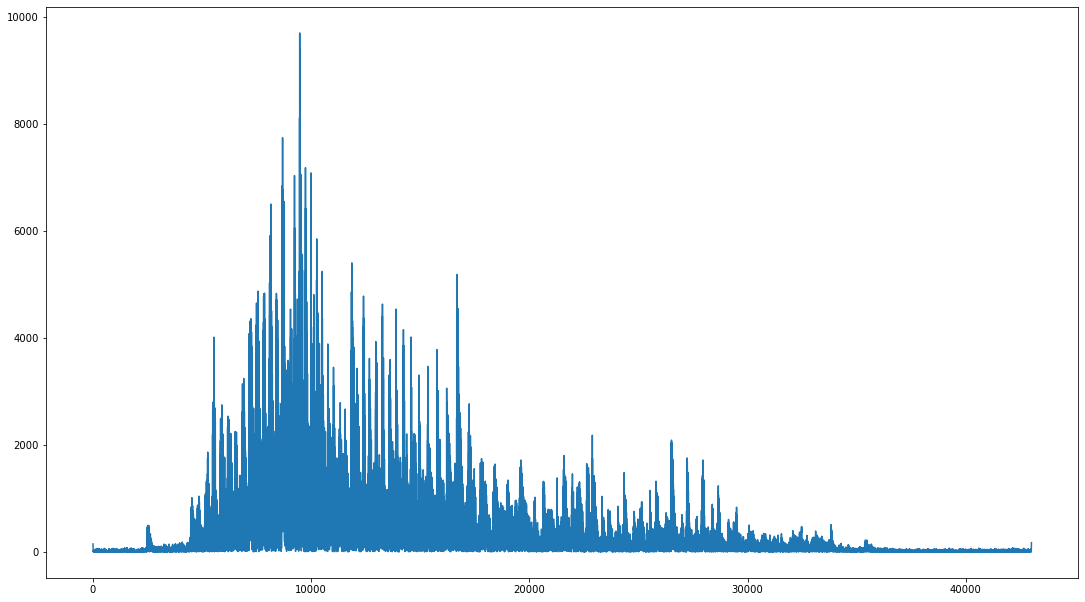

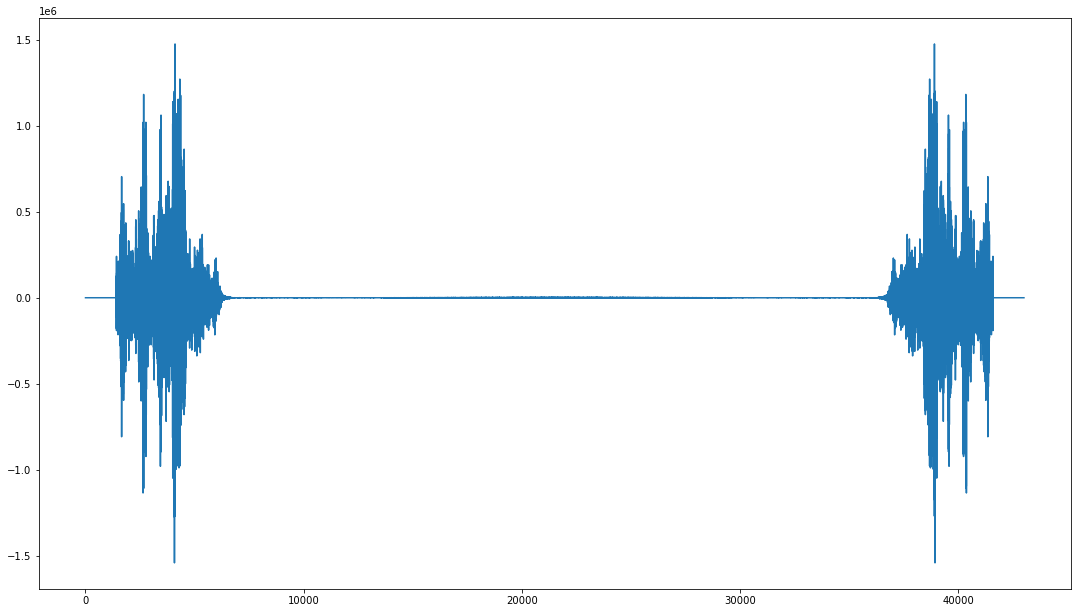

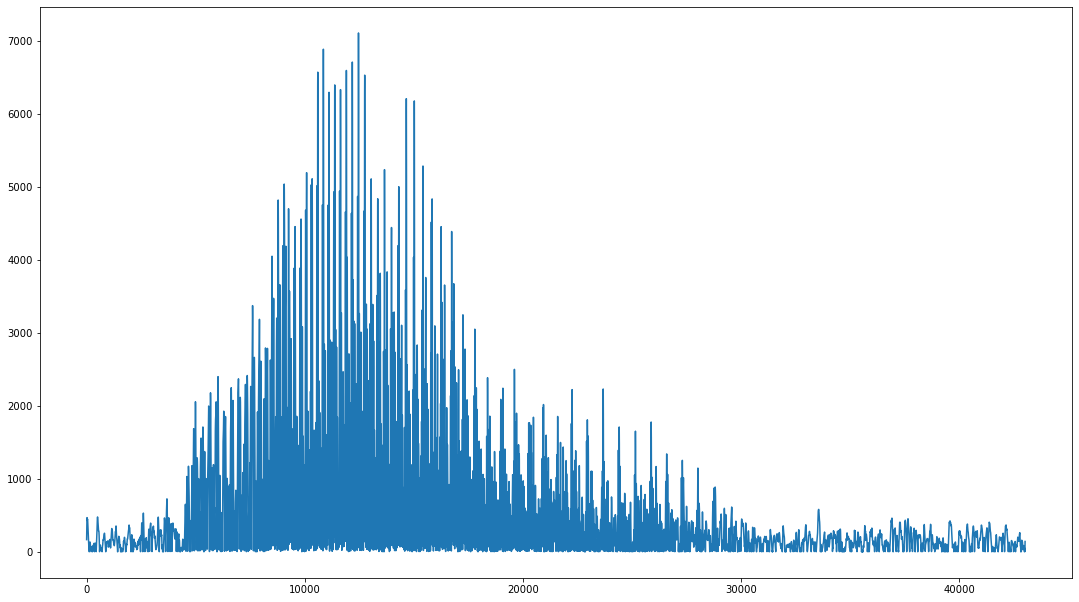

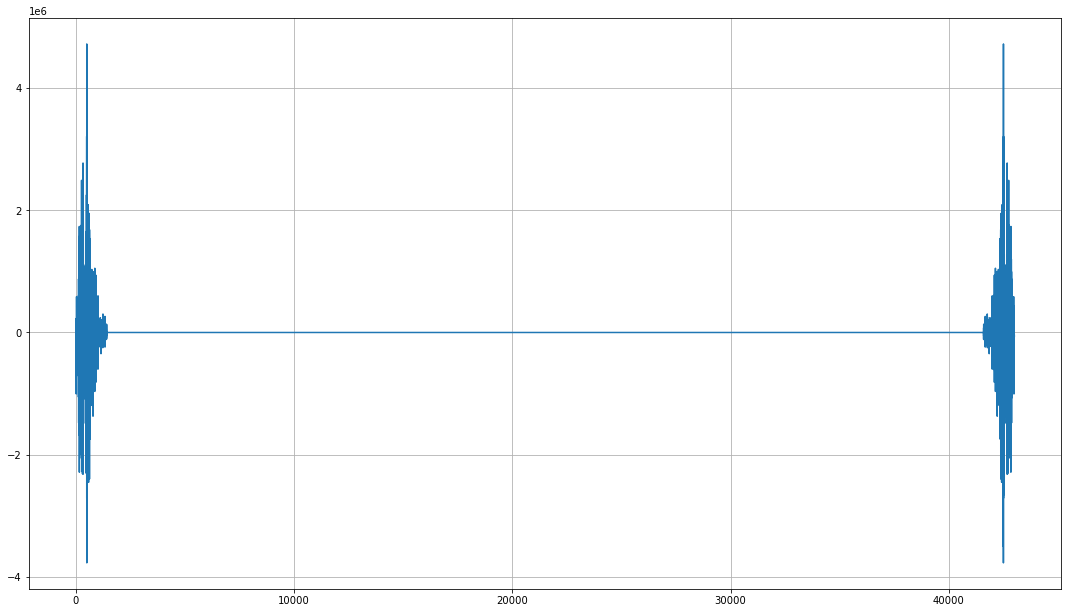

In [5]:
def separate(threshold):
    idx = threshold

    lowf = np.copy(yf)
    lowf[idx:] = 0
    lowf[:(len(data) - idx)] = 0
    
    highf = np.copy(yf)
    highf[(len(data) - idx):idx] = 0
        
    lowd = np.abs(ifft(lowf))
    highd = np.abs(ifft(highf))
    
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(np.arange(0, len(data)), lowd)

    fig, ax1 = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(np.arange(0, len(data)), lowf)

    fig, ax1 = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(np.arange(0, len(data)), highd)

    fig, ax1 = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(np.arange(0, len(data)), highf)

    plt.grid()
    plt.show()
    
    save(lowd, sample_rate, f'low_{threshold}')
    save(highd, sample_rate, f'high_{threshold}')

separate(41600)

In [6]:
for rate_mult in [0.25, 0.5, 1.5, 2]:
    save(data, int(sample_rate * rate_mult), f'data_ratemul-{rate_mult}')